<h1 style="font-family:URW Chancery L, cursive;color:red">Introduction</h1>
<p>Heart disease is one of the most significant problems that is arising in the world today. Cardiovascular disease prediction is a critical challenge in the area of clinical data analysis. Various studies give only a glimpse in predicting heart disease with ML techniques. The correct prediction of heart disease can prevent life threats, and incorrect prediction can prove to be fatal at the same time. If such a prediction is accurate enough, we can not only avoid wrong diagnosis but also save human resources. When a patient without a heart disease is diagnosed with heart disease, he will fall into unnecessary panic and when a patient with heart disease is not diagnosed with heart disease, he will miss the best chance to cure his disease. Such wrong diagnosis is painful to both patients and hospitals. With accurate predictions, we can solve the unnecessary trouble. Besides, if we can apply our machine learning tool into medical prediction, we will save human resource because we do not need complicated diagnosis process in hospitals.</p>

<h1 style="font-family:URW Chancery L, cursive;color:red;">Contents</h1>
<p>
<ol>
    <li>Setup</li>
    <li>Basic Data Information</li>
    <li>Column by Column Analysis</li>
    <li>Heart Disease Distribution for each Column</li>
    <li>Preparation of the Columns for Modelling</li>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>Deploying through streamlit</li>
</ol>
</p>

<h1 style="font-family:URW Chancery L, cursive;color:red;">1.Setup</h1>
<p>In this section, the libraries used in this project are imported</p>

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

#Data Loading, Manipulation, Analysis and Visualization Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Oridinal Encoder
from category_encoders import OrdinalEncoder

#Modelling Libraries
#(1)Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
#(2)Functions for model evaluation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import time

<h1 style="font-family:URW Chancery L, cursive;color:red;">2.Basic Data Information</h1>
<p>Loading the data</p>

In [4]:
data=pd.read_csv('heart_2020_cleaned.csv')
df=pd.read_csv('heart_2020_cleaned.csv')

<p>First five rows of the data are shown below</p>

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
print('number of rows:', data.shape[0])
print('number of columns:', data.shape[1])

number of rows: 319795
number of columns: 18


In [7]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Above is the list of the columns. According to the [dataset page](https://www.cdc.gov/heartdisease/risk_factors.htm), the details of each column is given as:
This is the reference to look at the meaning of the values.

| Column     | Detail |
| ----------- | ----------- |
| **HeartDisease**      |Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) |
| **BMI**   |Body Mass Index (BMI) |
| **Smoking**  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]|
| **AlcoholDrinking**  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)|
| **Stroke**  |(Ever told) (you had) a stroke? |
| **PhysicalHealth**  |Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?|
| **MentalHealth**  |Thinking about your mental health, for how many days during the past 30 days was your mental health not good?  |
| **DiffWalking**  |Do you have serious difficulty walking or climbing stairs? |
| **Sex**  |Are you male or female?  |
| **AgeCategory**  |Fourteen-level age category  |
| **Race**  |Imputed race/ethnicity value  |
| **Diabetic**  |(Ever told) (you had) diabetes?  |
| **PhysicalActivity**  |Adults who reported doing physical activity or exercise during the past 30 days other than their regular job  |
| **GenHealth**  |Would you say that in general your health is...  |
| **SleepTime**  |On average, how many hours of sleep do you get in a 24-hour period?  |
| **Asthma**  |(Ever told) (you had) asthma?  |
| **KidneyDisease**  |Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? |
| **SkinCancer**  |(Ever told) (you had) skin cancer?  |

Checking for null data

In [8]:
data.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

there are no missing values in the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<p>We can observe that BMI and SleepTime has extremely high values.</p>
<p>We have to even check for attributes with dtype value as object.</p>

In [11]:
data.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


<h1 style="font-family:URW Chancery L, cursive;color:red;">3.Column by Column Analysis</h1>
<p>Distribution of each column is analyzed</p>
<br>
<b>Heart Disease</b>
<p>This is the target column for the classification task.</p>
<br>

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

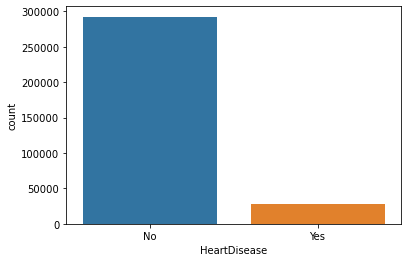

In [12]:
sns.countplot(x="HeartDisease",data=data)

In [13]:
pd.DataFrame(round((data['HeartDisease'].value_counts()/data.shape[0]*100),2))

,HeartDisease
No,91.44
Yes,8.56


<p>Most people in this dataset are reported not to have a heart disease.(coronary heart disease (CHD) or myocardial infarction (MI) in specific)</p>

<b style="font-size:105%">BMI</b>

Text(0, 0.5, 'Weight')

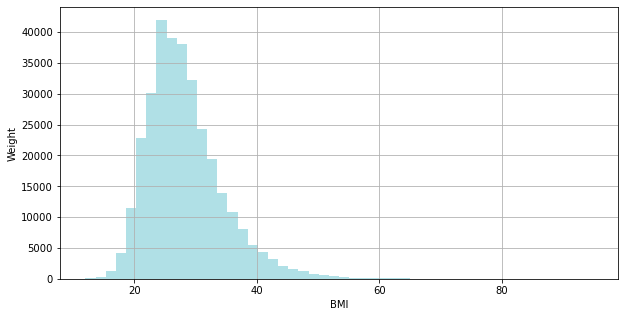

In [14]:
ar=data['BMI'].hist(bins = 50, color = 'powderblue', figsize = (10,5))
ar.set_xlabel("BMI")
ar.set_ylabel("Weight")

<p>The distribution of BMI seems mostly normal though there is a slight right skewardness</p>
<p>The percentage of outliers is towards left and right is calculated</p>

In [15]:
BMI_75 = data['BMI'].describe()['75%']
BMI_25 = data['BMI'].describe()['25%']
BMI_IQR = BMI_75 - BMI_25

#Outlier Check (%)
print(round(data[data['BMI'] > BMI_75 + 1.5 * BMI_IQR]['BMI'].count()/data.shape[0]*100, 2))
print(round(data[data['BMI'] < BMI_25 - 1.5 * BMI_IQR]['BMI'].count()/data.shape[0]*100, 2))

3.24
0.01


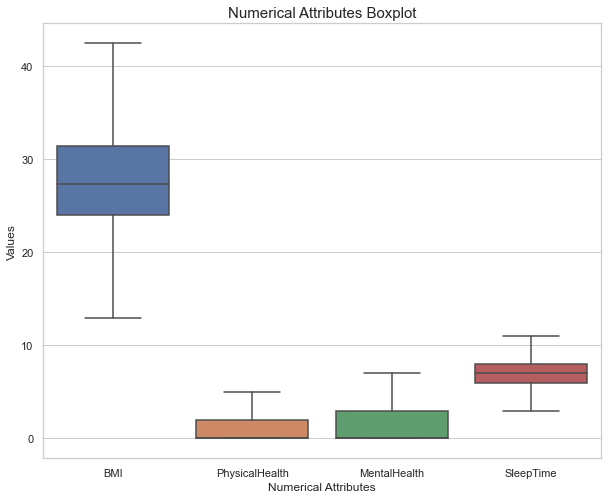

In [16]:
df_num=data.select_dtypes(include=["float64"])
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

Columns with answers given yes or no(Categorical values with only yes or no)

In [17]:
Yes_No_Columns = [column for column in data.columns if (len(data[column].value_counts()) == 2)]
Yes_No_Columns.remove('HeartDisease')
Yes_No_Columns.remove('Sex')
print(Yes_No_Columns)
len(Yes_No_Columns)

['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


8

There are eight columns of this kind (excluding HeartDisease).

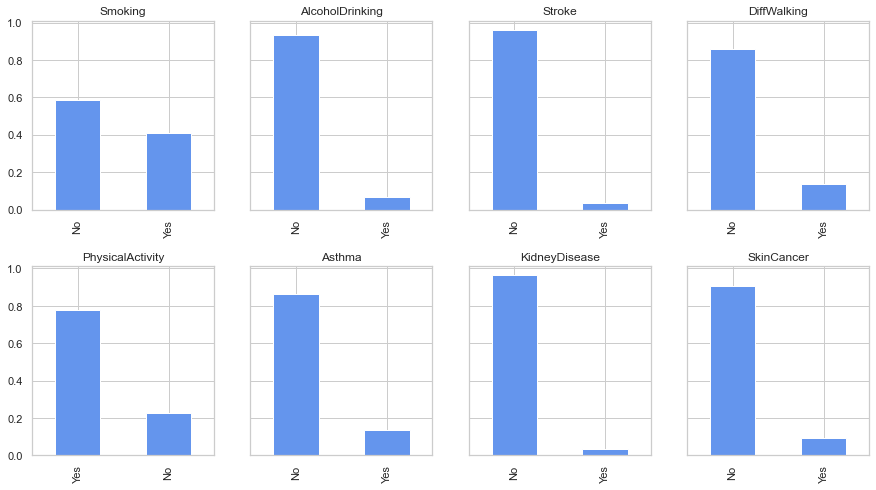

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.3)

for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    (data[Column].value_counts()/data.shape[0]).plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'cornflowerblue')

For each of the plot above, we can see the proportions/distribution of Yes/No results to the related attributes.Out of them most values dont have a good distribution but Smoking has got a balanced distribution.

<b>Physical And Mental Health</b>

<AxesSubplot:>

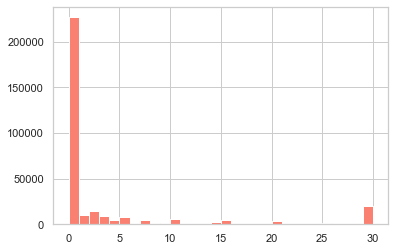

In [19]:
data['PhysicalHealth'].hist(bins = 30, color = 'salmon')

<AxesSubplot:>

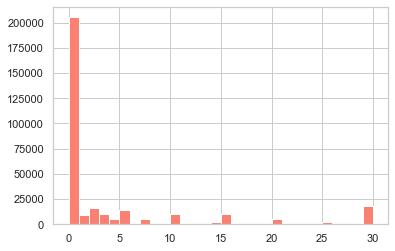

In [20]:
data['MentalHealth'].hist(bins = 30, color = 'salmon')

For both Physical Health and Mental health, we can see a heavy right skew. It also seems that most people answered '0 days' for both, which sounds like they are 'normal'. But compared to other answers like '8 days' or '15 days', many people (in comparison to other answers within the 1-30 range) answered '30 days', which basically sounds like they don't feel good every day.

<b>Sex</b>

<AxesSubplot:>

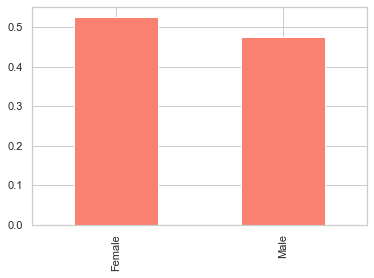

In [21]:
(data['Sex'].value_counts()/data.shape[0]).plot(kind = 'bar', color = 'salmon')

<p>Gender distribution seems to be fairly even</p>

<b>AgeCategory, Race, Diabetic and GenHealth</b>

In [22]:
pd.DataFrame(data['AgeCategory'].value_counts()).style.bar(color='thistle')

,AgeCategory
65-69,34151
60-64,33686
70-74,31065
55-59,29757
50-54,25382
80 or older,24153
45-49,21791
75-79,21482
18-24,21064
40-44,21006


From this we found out that that in this dataset more people are from the age group 50-69

In [23]:
pd.DataFrame(data['Race'].value_counts()).style.bar(color='thistle')

,Race
White,245212
Hispanic,27446
Black,22939
Other,10928
Asian,8068
American Indian/Alaskan Native,5202


In [24]:
pd.DataFrame(data['Diabetic'].value_counts()).style.bar(color = 'thistle')

,Diabetic
No,269653
Yes,40802
"No, borderline diabetes",6781
Yes (during pregnancy),2559


In [25]:
pd.DataFrame(data['GenHealth'].value_counts()).style.bar(color='navajowhite')

,GenHealth
Very good,113858
Good,93129
Excellent,66842
Fair,34677
Poor,11289


<b>Sleep Time</b>

<AxesSubplot:>

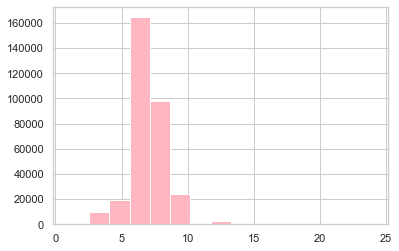

In [26]:
data['SleepTime'].hist(bins = 15, color = 'lightpink')

Table Visualization of the same column is shown below (SleepTime)

In [27]:
pd.DataFrame(data['SleepTime'].value_counts().sort_index()).style.bar(color='lightpink')

,SleepTime
1.0,551
2.0,788
3.0,1992
4.0,7750
5.0,19184
6.0,66721
7.0,97751
8.0,97602
9.0,16041
10.0,7796


In [28]:
round(100 * (data['SleepTime'] > 12).sum()/data.shape[0], 2) #Percentage of people with 12 hours of sleep.

0.31

There are small proportions with over 12 hours of sleep (about 0.3% in total)

<b>Correlation Matrix</b>
<p>We only have 4 numerical columns out of 18 columns,so the correlation matrix is as follows:</p>

In [29]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

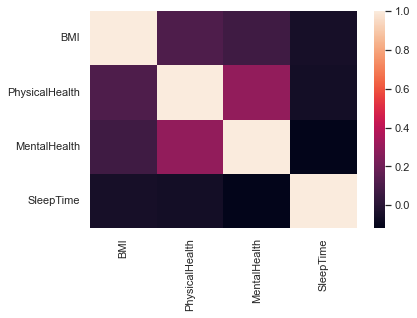

In [30]:
sns.heatmap(data.corr())

<h1 style="font-family:URW Chancery L, cursive;color:red">4. Heart Disease Distribution for each Column</h1>
<p>In the following, <b>Heart Disease Distribution</b> for each of the other columns is shown.</p>
<br>
<p>Since the HeartDisease columns are given as 'Yes' or 'No' values, the following code will change them into numerics (Yes: 1, No: 0)</p>

In [31]:
data['HeartDisease'] = 1 * (data['HeartDisease'] == 'Yes')
pd.DataFrame(data['HeartDisease'].head(5))

,HeartDisease
0,0
1,0
2,0
3,0
4,0


<b>Yes_Or_No Columns</b>

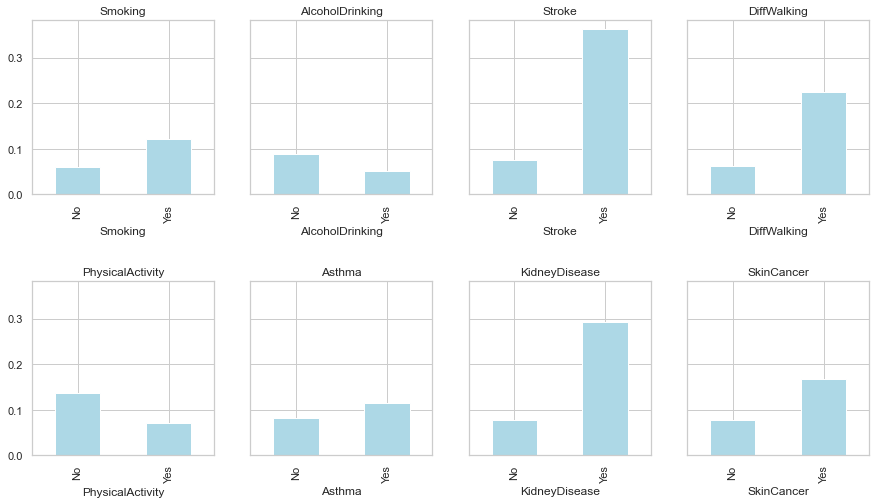

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey = True, figsize = (15,8))
plt.subplots_adjust(hspace = 0.5)

for Column in Yes_No_Columns:
    row_n= int((Yes_No_Columns.index(Column) - Yes_No_Columns.index(Column) % 4)/4)
    column_n = Yes_No_Columns.index(Column) % 4
    data.groupby(Column)['HeartDisease'].mean().plot(kind = 'bar', ax = axes[row_n,column_n], title = Column, color = 'lightblue')

people who already suffered from a stroke and have kidney disease have high chances of suffering from a heart disease.

<b>Sex, AgeCategory, Race, Diabetic, GenHealth</b>

<AxesSubplot:xlabel='Sex'>

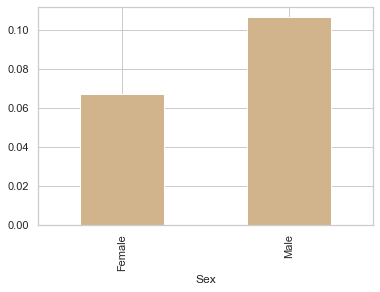

In [33]:
data.groupby('Sex')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

We can see that there is a higher proportion with males.

<AxesSubplot:xlabel='AgeCategory'>

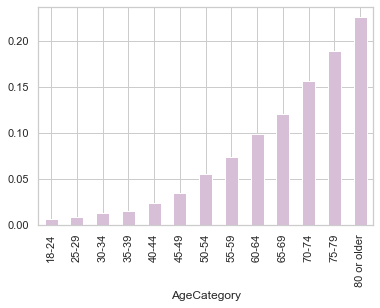

In [34]:
data.groupby('AgeCategory')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

We can see that there is a higher proportion with more age category.

<AxesSubplot:xlabel='Race'>

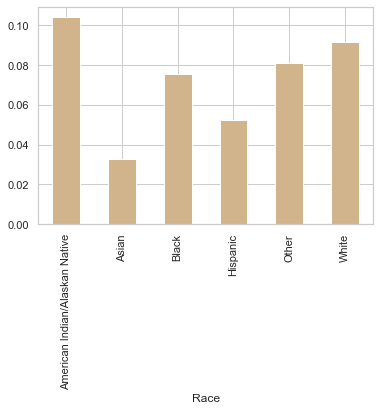

In [35]:
data.groupby('Race')['HeartDisease'].mean().plot(kind = 'bar', color = 'tan')

Lowest Proportion with 'Asian' and Highest with 'American Indian/Alaskan Native'.

<AxesSubplot:xlabel='Diabetic'>

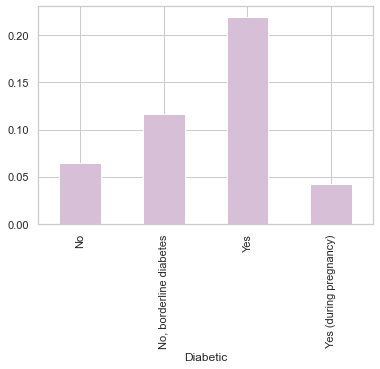

In [36]:
data.groupby('Diabetic')['HeartDisease'].mean().plot(kind = 'bar', color = 'thistle')

<AxesSubplot:xlabel='GenHealth'>

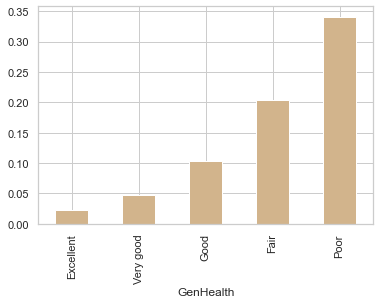

In [37]:
data.groupby('GenHealth')['HeartDisease'].mean().sort_values().plot(kind = 'bar', color = 'tan')

<b>BMI</b>
<p><a href="https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html">link</a> shows the following table of BMI Interpretations:</p>

In [38]:
pd.DataFrame(data = {'Weight Status' :['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity']}, index = ['Below 18.5', '18.5-24.9', '25.0-29.9', '30.0 and Above'])

,Weight Status
Below 18.5,Underweight
18.5-24.9,Healthy Weight
25.0-29.9,Overweight
30.0 and Above,Obsesity


Heart Disease Distribution according to the above table yields the following result:

<AxesSubplot:xlabel='BMI_1'>

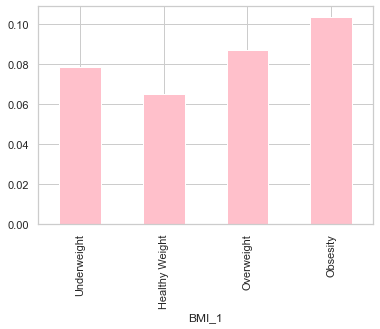

In [39]:
data['BMI_1'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,100], labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity'], right = False)
data.groupby('BMI_1')['HeartDisease'].mean().plot(kind = 'bar', color = 'pink')

<AxesSubplot:xlabel='BMI_2'>

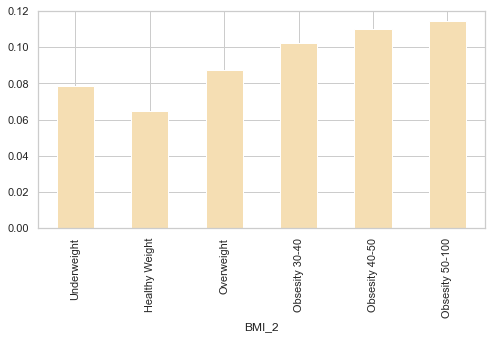

In [40]:
data['BMI_2'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,40,50,100], labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obsesity 30-40', 'Obsesity 40-50', 'Obsesity 50-100'], right = False)
data.groupby('BMI_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'wheat', figsize = (8,4))

<b>PhysicalHealth and MentalHealth</b>
<p></p>

<AxesSubplot:xlabel='PhysicalHealth_2'>

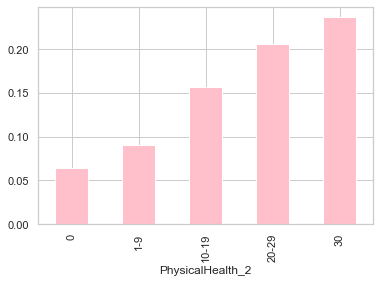

In [41]:
data['PhysicalHealth_2'] = pd.cut(data['PhysicalHealth'], [0,1,10,20,30,31], labels = ['0','1-9','10-19','20-29','30'], right = False)
data.groupby('PhysicalHealth_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'pink')

<AxesSubplot:xlabel='MentalHealth_2'>

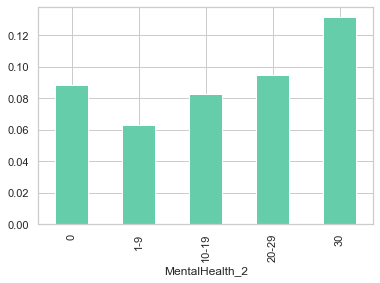

In [42]:
data['MentalHealth_2'] = pd.cut(data['MentalHealth'], [0,1,10,20,30,31],labels = ['0','1-9','10-19','20-29','30'], right = False)
data.groupby('MentalHealth_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'mediumaquamarine')

The <a href="https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html">link</a> says that the recommended hours of sleep for adults is
7 or more (18-60 years)
7-9 hours (61-64 years)
7-8 hours (65 years and older)

Following is the categorization/binning of the sleep hours and what the mean value of HeartDisease is for each.

<AxesSubplot:xlabel='SleepTime_2'>

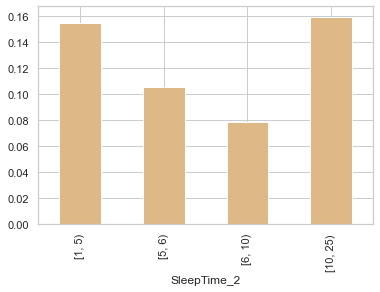

In [43]:
data['SleepTime_2'] = pd.cut(data['SleepTime'], [1,5,6,10,25], right = False)
data.groupby('SleepTime_2')['HeartDisease'].mean().plot(kind = 'bar', color = 'burlywood')

<h1 style="font-family:URW Chancery L, cursive;color:red">5. Preparation of the Columns for Modelling</h1>
In order for the columns to be used for modelling, the columns will be 'prepared' (transformed➡️ to numeric values)

Currently, the data table looks like the following:

In [44]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_1,BMI_2,PhysicalHealth_2,MentalHealth_2,SleepTime_2
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Very good,5.0,Yes,No,Yes,Underweight,Underweight,1-9,30,"[5, 6)"
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Very good,7.0,No,No,No,Healthy Weight,Healthy Weight,0,0,"[6, 10)"
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Fair,8.0,Yes,No,No,Overweight,Overweight,20-29,30,"[6, 10)"
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,Good,6.0,No,No,Yes,Healthy Weight,Healthy Weight,0,0,"[6, 10)"
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Very good,8.0,No,No,No,Healthy Weight,Healthy Weight,20-29,0,"[6, 10)"


Binary Categorical Columns

In [45]:
for Column in Yes_No_Columns:
    data[Column] = 1 * (data[Column] == 'Yes')

data['Sex'] = 1 * (data['Sex'] == 'Male')

Ordinal Categorical Columns

In [46]:
data['BMI'] = pd.cut(data['BMI'], [0,18.5,25.0,30.0,40,50,100], labels = [0,1,2,3,4,5], right = False)

data['PhysicalHealth'] = pd.cut(data['PhysicalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['MentalHealth'] = pd.cut(data['MentalHealth'], [0,1,10,20,30,31],labels = [0,1,2,3,4], right = False)

data['SleepTime'] = pd.cut(data['SleepTime'], [1,5,6,10,25], labels =[0,1,2,3] , right = False)

data = data.drop(['PhysicalHealth_2','MentalHealth_2','SleepTime_2','BMI_1','BMI_2'], axis = 1)

mapping_1 = {}

for category in sorted(list(data['AgeCategory'].unique())):
    mapping_1[category] = sorted(list(data['AgeCategory'].unique())).index(category)

maplist_1 = [{'col': 'AgeCategory', 
            'mapping': mapping_1}]

Ordinal_Encoder_1 = OrdinalEncoder(mapping=maplist_1)

data = Ordinal_Encoder_1.fit_transform(data)

maplist_2 = [{'col': 'GenHealth', 
            'mapping': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}}]

Ordinal_Encoder_2 = OrdinalEncoder(mapping=maplist_2)

data = Ordinal_Encoder_2.fit_transform(data)

One Hot Encoding

In [47]:
for Race in data['Race'].unique():
    data[Race] = 1 * (data['Race'] == Race)

for Diabetic in data['Diabetic'].unique():
    data[Diabetic] = 1 * (data['Diabetic'] == Diabetic)   
    
data = data.drop(['Race','Diabetic'], axis = 1)

Below is the result of column preparation:

In [48]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,White,Black,Asian,American Indian/Alaskan Native,Other,Hispanic,Yes,No,"No, borderline diabetes",Yes (during pregnancy)
0,0,0,1,0,0,1,4,0,0,7,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,12,...,1,0,0,0,0,0,0,1,0,0
2,0,2,1,0,0,3,4,0,1,9,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,11,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,3,0,1,0,4,...,1,0,0,0,0,0,0,1,0,0


<h1 style="font-family:URW Chancery L, cursive;color:red">6. Classification using Logistic Regression</h1>
<br>
Splitting training and testing data

In [49]:
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

print(y_train.mean())
print(y_test.mean())

0.08583291350346577
0.08345841150719199


<b>Logistic Regression</b>

In [50]:
Classifier_1 = LogisticRegression(max_iter=300)

Classifier_1.fit(X_train, y_train)

Predictions_1 = Classifier_1.predict(X_test)

**Confusion Matrix**
Below is the confusion matrix for this model.

✏️Accuracy Score means 'How much(proportion) of the true labels did I get right?'<br>
✏️Precision Score: 'Out of the 1s that I predicted, how much did I get right?'<br>
✏️Recall Score: 'Out of 1s in the Test Set, how much did I get right?'


Accuracy Score:  0.9192933083176985
Precision Score:  0.5785714285714286
Recall Score:  0.12139378044211314
F1 Score: 0.20068132548776713


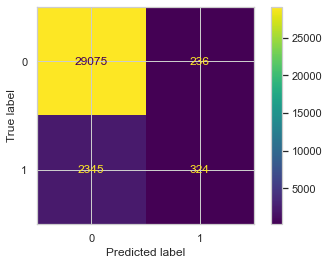

In [51]:
Confusion = confusion_matrix(y_test, Predictions_1)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_1))
print('Precision Score: ', precision_score(y_test, Predictions_1))
print('Recall Score: ', recall_score(y_test, Predictions_1))
print('F1 Score:',f1_score(y_test,Predictions_1))

<h1 style="font-family:URW Chancery L, cursive;color:red">7. Classification using RandomForest</h1>

In [52]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)

In [53]:
def outlier(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 3.0)]
    
    return df

In [54]:
def outlier_2(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.9)]
    
    return df

In [55]:
def outlier_3(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.2)]
    
    return df

In [56]:
print(train.shape)
train = outlier(train, ['SleepTime'])
print(train.shape)
train = outlier_2(train, ['BMI'])
print(train.shape)
train = outlier_3(train, ['PhysicalHealth'])
print(train.shape)
train = outlier_3(train, ['MentalHealth'])
print(train.shape)

(255836, 18)
(252209, 18)
(239853, 18)
(216503, 18)
(196479, 18)


In [57]:
print(test.shape)
test = outlier(test, ['SleepTime'])
print(test.shape)
test = outlier_2(test, ['BMI'])
print(test.shape)
test = outlier_3(test, ['PhysicalHealth'])
print(test.shape)
test = outlier_3(test, ['MentalHealth'])
print(test.shape)
(63959, 18)

(63959, 18)
(63043, 18)
(59793, 18)
(54007, 18)
(48968, 18)


(63959, 18)

In [58]:
train['Physical_MentalHealth'] = train['PhysicalHealth'] + train['MentalHealth']
test['Physical_MentalHealth'] = test['PhysicalHealth'] + test['MentalHealth']
train['PhysicalHealth_log'] = np.log1p(train['PhysicalHealth'])   #Take the logarithm after adding 1
train['MentalHealth_log'] = np.log1p(train['MentalHealth'])
test['PhysicalHealth_log'] = np.log1p(test['PhysicalHealth'])
test['MentalHealth_log'] = np.log1p(test['MentalHealth'])

In [60]:
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=train['HeartDisease'], test_size=.2, random_state=1205)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

In [61]:
#grid search

import time
t1 = time.time()

parameters = {  
    'n_estimators': [24,28,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (5,10,15),     
    'criterion'   : ['gini', 'entropy'],
}
model = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = model,     
                          param_grid = parameters, 
                          cv = 2,
                          n_jobs = -1,
                          return_train_score = False,
                          scoring = "accuracy"      
                         )
gridsearch.fit(X_train, y_train)

t2 = time.time()

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))
print((t2-t1)/60)

Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 24}
Best Score: 0.9302214613627682
1.662593424320221


In [62]:
forest = RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0)

In [63]:
print(forest.score(X_train,y_train))
print(forest.score(X_valid,y_valid))
print(forest.score(X_test,y_test))

0.9318946705432521
0.930171009771987
0.9300972063388335


Accuracy Score:  0.9300972063388335
Precision Score:  0.6140350877192983
Recall Score:  0.01018626309662398
F1 Score: 0.02004008016032064


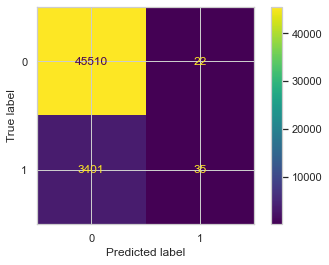

In [64]:
Predictions_2=forest.predict(X_test)
Confusion = confusion_matrix(y_test, Predictions_2)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_2))
print('Precision Score: ', precision_score(y_test, Predictions_2))
print('Recall Score: ', recall_score(y_test, Predictions_2))
print('F1 Score:',f1_score(y_test,Predictions_2))

<h1 style="font-family:URW Chancery L, cursive;color:red">8. Deployment through Streamlit app</h1>

creating a pickle file for the random forest model and used it as model on streamlit

In [65]:
import pickle
pickle_out = open("forest.pkl","wb")
pickle.dump(forest,pickle_out)
pickle_out.close()